---
title: "Exploratory Data Analysis"
author: Daniel Redel
date: today
format:
  html:
    toc: true
    code-fold: true
    html-math-method: katex
jupyter: python3
---

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore')

my_colors =['#28AFB0', '#F46036', '#F1E3D3', '#2D1E2F', '#26547C', '#28AFB0']
file = "D:/Career/Data Science/Portfolios/Inside AirBnB - Netherlands/Amsterdam/"

listings = pd.read_csv("listings_processed.csv") # processed data
calendar = pd.read_csv('calendar_processed.csv') # processed data
reviews_detailed = pd.read_csv('reviews_processed.csv') # processed data
neighbourhoods = pd.read_csv(file + 'neighbourhoods.csv')

In this section, we will conduct an Exploratory Data Analysis (EDA) to gain a deeper understanding of the Amsterdam Airbnb dataset.

This EDA serves as a important step in extracting valuable information and identifying key factors that influence Airbnb pricing in Amsterdam.

# `Listings` Statistics

Here is a quick overview of our `listings` dataset:

In [7]:
listings.head(2)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,2818,Quiet Garden View Room & Super Fast Wi-Fi,3159,Daniel,Oostelijk Havengebied - Indische Buurt,52.36435,4.94358,Private room,69,3,322,2023-02-28,1.90,1,44,37
1,20168,Studio with private bathroom in the centre 1,59484,Alexander,Centrum-Oost,52.36407,4.89393,Private room,106,1,339,2020-04-09,2.14,2,0,0


## Price

As previously shown, @fig-price-type presents the distribution of price of all our units in the sample:

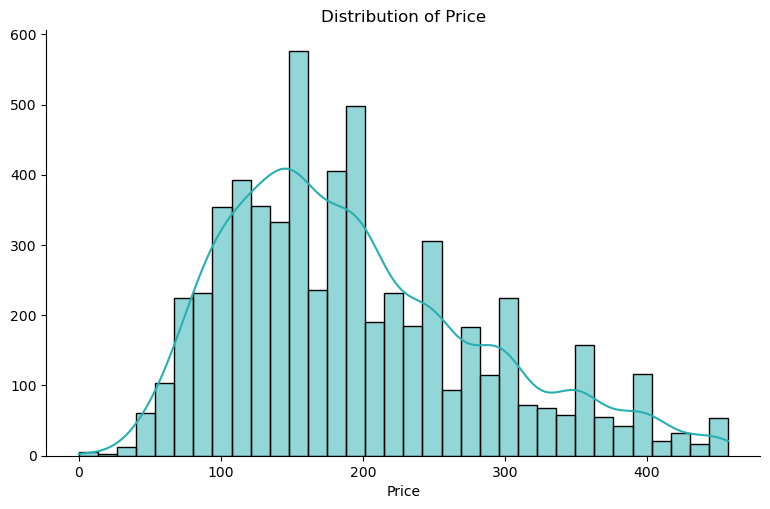

In [23]:
#| label: fig-price-type
#| fig-cap: Distribution of Price
import seaborn as sns
my_colors =['#28AFB0', '#F46036', '#F1E3D3', '#2D1E2F', '#26547C']

# Set up Figure
#fig, ax = plt.subplots(figsize=(8,5))

# Hist + KDE
sns.displot(data=listings, x="price", kde=True, color=my_colors[0], aspect=8/5)

# Labels
plt.xlabel('Price')
plt.ylabel('')
plt.title('Distribution of Price')

# Show the Plot
plt.show()

The average price per night for Airbnb listings in Amsterdam is approximately `190` euros.

Let's also check price evolution:

In [113]:
calendar.price = calendar.price.replace('[\$,]', '', regex=True).astype(float)

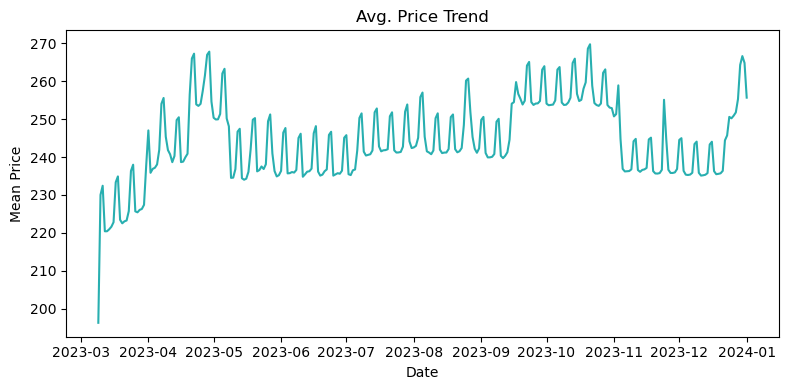

In [122]:
#| label: fig-price-trend
#| fig-cap: Average Price Trend
import seaborn as sns
my_colors =['#28AFB0', '#F46036', '#F1E3D3', '#2D1E2F', '#26547C']

calendar['date'] = pd.to_datetime(calendar['date'])
price_series = calendar.groupby("date")["price"].agg(["mean","median"]).reset_index()

#Filter
filter_date = price_series['date'] <= pd.Timestamp('2024-01-01')

# Set up Figure
fig, ax = plt.subplots(figsize=(8,4))

# Line Plot
sns.lineplot(price_series[filter_date], x='date', y='mean', color=my_colors[0])

# Labels
plt.xlabel('Date')
plt.ylabel('Mean Price')
plt.title('Avg. Price Trend')

# Show the Plot
plt.tight_layout()
plt.show()

## Property Characteristics - Type

We compute summary statistics of prices categorized by room type, which include private room, entire home, hotel room, and shared room.

In [8]:
#| label: tbl-price-type
#| tbl-cap: Price by Type
listings.groupby("room_type")['price'].agg(['mean','count']).round(1)

,mean,count
room_type,,
Entire home/apt,214.4,4294
Hotel room,154.0,58
Private room,140.9,1630
Shared room,95.9,36


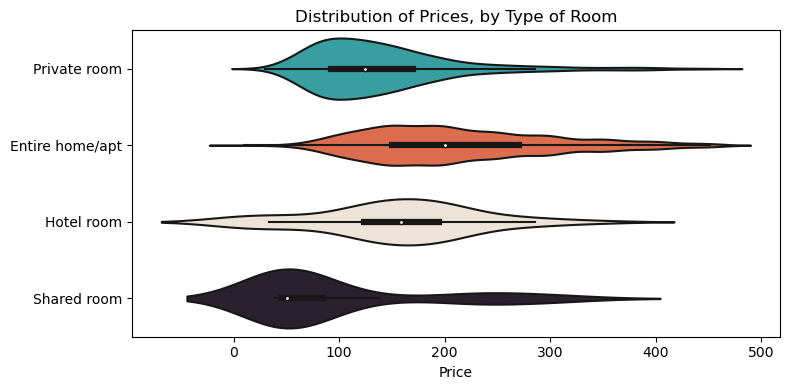

In [9]:
#| label: fig-price-type-dist
#| fig-cap: Distribution of Prices, by Type of Room
import seaborn as sns
my_colors =['#28AFB0', '#F46036', '#F1E3D3', '#2D1E2F', '#26547C']

# Set up Figure
fig, ax = plt.subplots(figsize=(8,4))

# Violin Plot
sns.violinplot(data=listings, x="price", y="room_type", palette=my_colors)

# Labels
plt.xlabel('Price')
plt.ylabel('')
plt.title('Distribution of Prices, by Type of Room')

# Show the Plot
plt.tight_layout()
plt.show()

Upon analyzing @tbl-price-type and @fig-price-type-dist, it's evident that entire homes command the highest prices in the Amsterdam Airbnb market (`214` euros), followed by hotel rooms (`154` euros). This observation suggests that guests are willing to pay a premium for the privacy and amenities offered by entire accommodations. 

Additionally, we note that private rooms exhibit less dispersion in prices compared to entire homes and hotel rooms. This might imply a more consistent pricing structure within the private room category, possibly influenced by factors such as location, amenities, and room size. 

We also computed the average minimum nights required for booking across different room types in the Amsterdam Airbnb market:

In [33]:
#| label: tbl-nights-type
#| tbl-cap: Minimum Nights by Type
listings.groupby("room_type")['minimum_nights'].agg(['mean']).round(1)

,mean
room_type,
Entire home/apt,4.5
Hotel room,1.3
Private room,3.3
Shared room,1.5


@tbl-nights-type suggest that entire homes and private rooms typically require a longer minimum stay compared to hotel rooms and shared rooms. One potential factor contributing to this discrepancy is **economies of scale**. Larger accommodations such as entire homes and private rooms may require longer minimum stays to offset operational costs and maximize profitability. Conversely, hotel rooms and shared rooms, which typically offer more compact and flexible accommodations, tend to have shorter minimum stay requirements. 

In [40]:
#| label: tbl-reviews-type
#| tbl-cap: Number of Reviews by Type
listings.groupby("room_type")['number_of_reviews'].agg(['mean','sum']).round(1).sort_values('mean', ascending= False)

,mean,sum
room_type,,
Hotel room,138.9,8610
Private room,120.9,210680
Shared room,115.7,4514
Entire home/apt,22.5,116001


In [37]:
#| label: tbl-reviews-month-type
#| tbl-cap: Reviews per Month by Type
listings.groupby("room_type")['reviews_per_month'].agg(['mean']).round(1).sort_values('mean', ascending= False)

,mean
room_type,
Shared room,4.5
Hotel room,2.7
Private room,2.4
Entire home/apt,0.6


Hotel rooms have the highest average number of reviews per listing, followed by private rooms and shared rooms, while entire homes/apartments have the lowest average number of reviews.

This suggests that hotel rooms tend to receive more feedback from guests compared to other accommodation types.

## Prices by Neighbourhood

In [6]:
#| label: tbl-price-neigh
#| tbl-cap: Prices by Neighbourhood
my_statistics = ['mean','median', 'count']

neigh_df = listings.groupby("neighbourhood")['price'].agg(
    my_statistics).round(1).sort_values(
    "mean", ascending = False)
neigh_df

,mean,median,count
neighbourhood,,,
De Pijp - Rivierenbuurt,213.0,200.0,685
Centrum-Oost,210.2,195.0,584
Zuid,205.6,195.0,368
Centrum-West,202.8,180.0,789
De Baarsjes - Oud-West,200.8,184.0,979
Westerpark,193.7,179.0,429
IJburg - Zeeburgereiland,192.3,170.0,135
Oud-Oost,190.3,175.0,366
Watergraafsmeer,185.3,177.5,172


In our analysis of Amsterdam Airbnb listings, we've identified several neighborhoods commanding higher average prices, notably De Pijp - Rivierenbuurt, Centrum-Oost, Zuid, and Centrum-West. With average prices ranging from `202` to `213` euros per night, these neighborhoods emerge as premium destinations within the Amsterdam accommodation market. Notably, De Pijp - Rivierenbuurt, historically recognized for its affluent reputation, continues to attract visitors seeking upscale experiences.

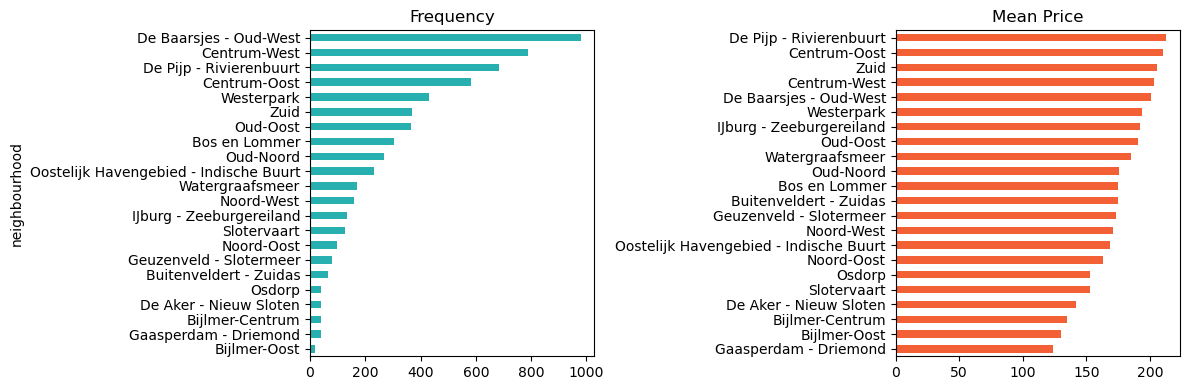

In [64]:
#| label: fig-neigh
#| fig-cap: Count and Mean Price by Neighbourhood

# Set up Figure
fig, axs = plt.subplots(1, 2, figsize=(12,4))

# Plot
neigh_df.sort_values("count")['count'].plot(ax=axs[0], color=my_colors[0], kind='barh')
neigh_df.sort_values("mean")['mean'].plot(ax=axs[1], color=my_colors[1], kind='barh')

# Labels
axs[0].set_title('Frequency')
axs[1].set_title('Mean Price')

axs[0].set_xlabel('')
axs[1].set_xlabel('')

axs[0].set_ylabel('neighbourhood')
axs[1].set_ylabel('')

# Show the Plot
plt.tight_layout()
plt.show()


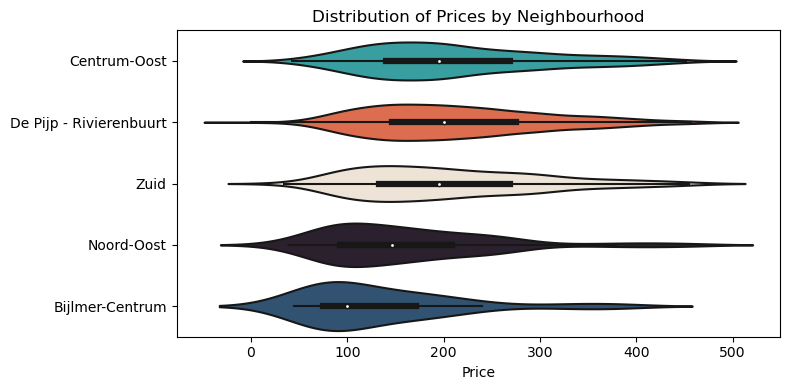

In [10]:
#| label: fig-price-neigh-violin
#| fig-cap: Distribution of Prices by Neighbourhood (subsample)

import seaborn as sns
my_colors =['#28AFB0', '#F46036', '#F1E3D3', '#2D1E2F', '#26547C']

# Set up Figure
fig, ax = plt.subplots(figsize=(8,4))

# Filter
some_neighs = listings['neighbourhood'].isin(
    ['Centrum-Oost','Zuid', 'De Pijp - Rivierenbuurt', 'Noord-Oost', 'Bijlmer-Centrum'])

# Violin Plot
sns.violinplot(data=listings[some_neighs], x="price", y="neighbourhood", palette=my_colors)

# Labels
plt.xlabel('Price')
plt.ylabel('')
plt.title('Distribution of Prices by Neighbourhood (subsample)')

# Show the Plot
plt.tight_layout()
plt.show()

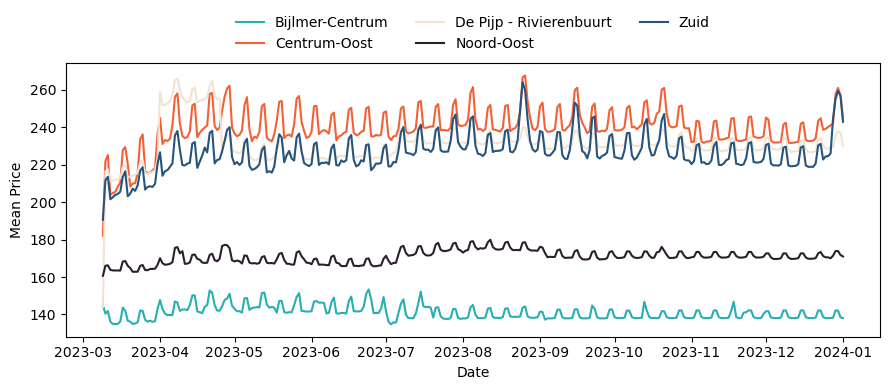

In [166]:
#| label: fig-price-trend-neigh
#| fig-cap: Average Price Trend, by some Neighbourhoods
import seaborn as sns
my_colors =['#28AFB0', '#F46036', '#F1E3D3', '#2D1E2F', '#26547C']

calendar['date'] = pd.to_datetime(calendar['date'])

#merge
merged_calendar = calendar.merge(listings[["id",'neighbourhood']], left_on='listing_id', right_on='id', how="left")

# group
price_series = merged_calendar.groupby(["date", "neighbourhood"])["price"].agg(["mean","median"]).reset_index()

#Filter
filter_date = price_series['date'] <= pd.Timestamp('2024-01-01')

# Filter
some_neighs = price_series['neighbourhood'].isin(
    ['Centrum-Oost','Zuid', 'De Pijp - Rivierenbuurt', 'Noord-Oost', 'Bijlmer-Centrum'])


## Set up Figure ##
###################

fig, ax = plt.subplots(figsize=(9,4))

# Line Plot
sns.lineplot(price_series[filter_date & some_neighs], x='date', y='mean', hue="neighbourhood", palette=my_colors)
sns.move_legend(ax, "lower center", bbox_to_anchor=(0.5, 1), ncol=3, title=None, frameon=False)


# Labels
plt.xlabel('Date')
plt.ylabel('Mean Price')
plt.title('')

# Show the Plot
plt.tight_layout()
plt.show()

After plotting the time series of average prices across the top neighborhoods and other neighborhoods in Amsterdam ( @fig-price-trend-neigh ), we observe a consistent and steady evolution of prices over time, with no significant increasing trend. 

This stable pricing pattern suggests that the Amsterdam Airbnb market maintains a relatively balanced and predictable pricing environment across different neighborhoods. Despite fluctuations influenced by seasonal variations or occasional events, there is no clear upward trajectory in prices over the observed time period

# `Reviews` Statistics

We can use the `jointplot` function to visualize the relationship between price, number of reviews, and room type:

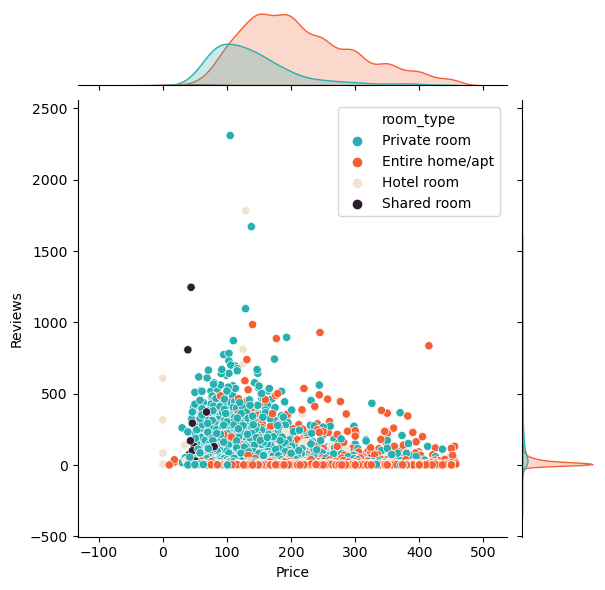

In [36]:
#| label: fig-reviews-type-price
#| fig-cap: Reviews and Price, by Type
import seaborn as sns
my_colors =['#28AFB0', '#F46036', '#F1E3D3', '#2D1E2F', '#26547C']

# Set up Figure
#fig, ax = plt.subplots(figsize=(8,5))

# Hist + KDE
sns.jointplot(data=listings, y="number_of_reviews", x="price", hue='room_type', palette=my_colors)

# Labels
plt.ylabel('Reviews')
plt.xlabel('Price')
#plt.title('Distribution of Price')

# Show the Plot
plt.show()

Private rooms, often priced lower than entire homes, may attract guests looking for budget-friendly accommodations, which could contribute to lower review counts. 

## Reviews per Month

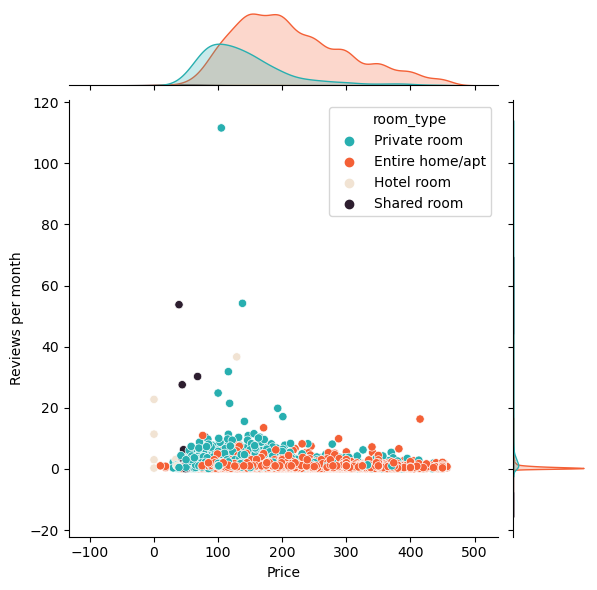

In [35]:
#| label: fig-reviews-months-type-price
#| fig-cap: Reviews per month and Price, by Type
import seaborn as sns
my_colors =['#28AFB0', '#F46036', '#F1E3D3', '#2D1E2F', '#26547C']

# Set up Figure
#fig, ax = plt.subplots(figsize=(8,5))

# Hist + KDE
sns.jointplot(data=listings, y="reviews_per_month", x="price", hue='room_type', palette=my_colors)

# Labels
plt.ylabel('Reviews per month')
plt.xlabel('Price')
#plt.title('Distribution of Price')

# Show the Plot
plt.show()